Bank Term Deposit Prediction

Life cycle of Machine learning Project

Understanding the Problem Statement
Data Collection
Exploratory data analysis
Data Cleaning
Data Pre-Processing
Model Training
Choose best model

About Dataset

Bank Marketing

Abstract:
The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. 
The classification goal is to predict if the client will subscribe a term deposit (variable y).

Data Set Information:
The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns 
were based on phone calls. Often, more than one contact to the same client was required, in order to access if the 
product (bank term deposit) would be ('yes') or not ('no') subscribed.

Problem Statement

Managing and analyzing the vast amount of data generated from routine business operations is a significant challenge for the banking industry. Banks play a crucial role in the economy and offer numerous financial services to customers. Telemarketing is a common strategy used by banks to promote new products and services. This type of campaign generates large datasets, and proper analysis of this data can support banks in planning future strategies. Therefore, it is essential to develop an approach for analyzing and predicting outcomes based on telemarketing campaign data, helping banks improve their processes and decision-making.

Data Collection
https://www.kaggle.com/datasets/henriqueyamahata/bank-marketing

1 Import Data and Required Packages

In [2]:
#Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings

warnings.filterwarnings("ignore")

%matplotlib inline

In [3]:
#Import the CSV Data as Pandas DataFrame
df = pd.read_csv(r"bank-additional-full.csv",sep = ';')

In [4]:
#Show Top 5 Records
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [5]:
df.shape

(41188, 21)

In [6]:
# Display summary statistics for a dataframe
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [7]:
# Check Null and Dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

EXPLORING DATA

In [8]:
# define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 10 numerical features : ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']

We have 11 categorical features : ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'y']


In [9]:
# proportion of count data on categorical columns
for col in categorical_features:
    print(df[col].value_counts(normalize=True) * 100)
    print('-----------')

job
admin.           25.303486
blue-collar      22.467709
technician       16.371273
services          9.636302
management        7.099155
retired           4.175974
entrepreneur      3.535010
self-employed     3.450034
housemaid         2.573565
unemployed        2.461882
student           2.124405
unknown           0.801204
Name: proportion, dtype: float64
-----------
marital
married     60.522482
single      28.085850
divorced    11.197436
unknown      0.194231
Name: proportion, dtype: float64
-----------
education
university.degree      29.542585
high.school            23.101389
basic.9y               14.676605
professional.course    12.729436
basic.4y               10.138875
basic.6y                5.564728
unknown                 4.202680
illiterate              0.043702
Name: proportion, dtype: float64
-----------
default
no         79.120132
unknown    20.872584
yes         0.007284
Name: proportion, dtype: float64
-----------
housing
yes        52.384190
no         45.212198
u

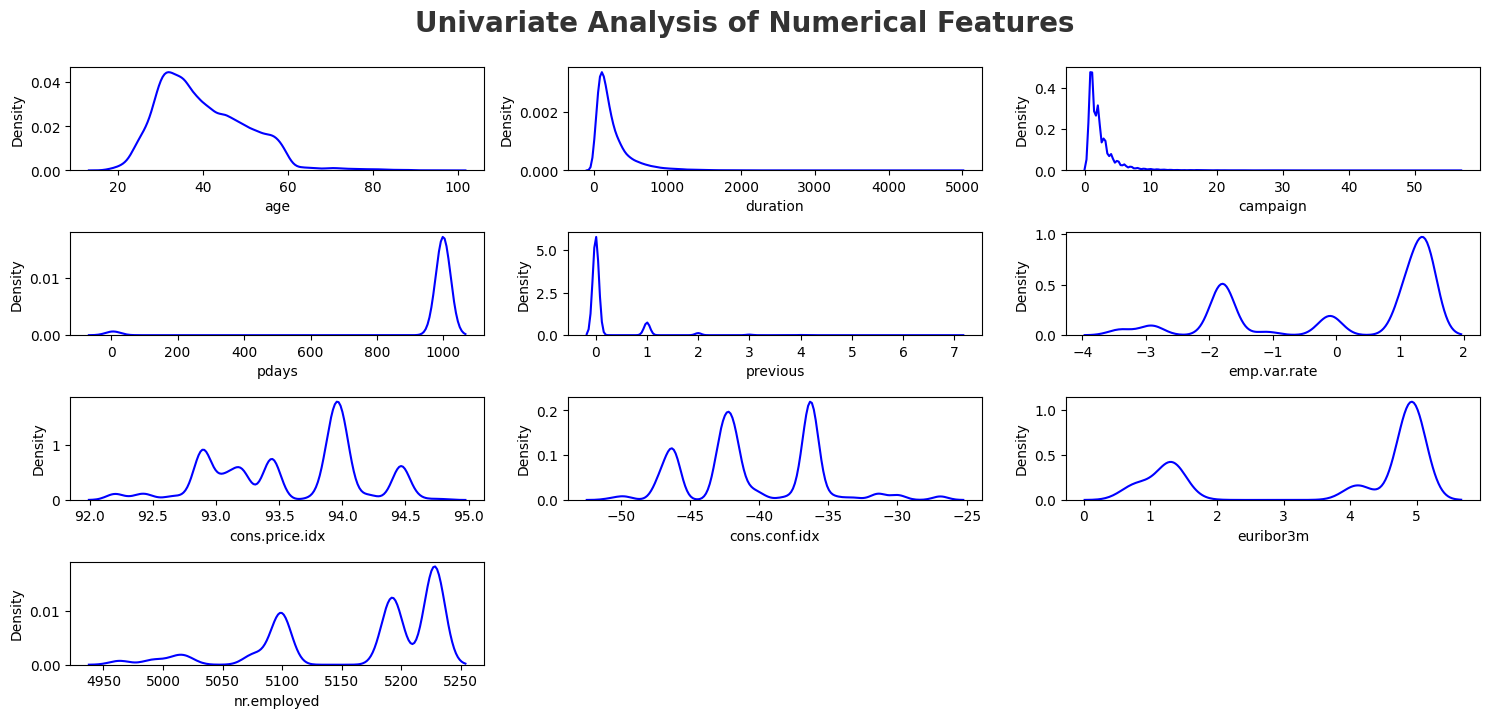

In [10]:
#Univariate Analysis of Numerical Features
plt.figure(figsize=(15, 10))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(numeric_features)):
    plt.subplot(6, 3, i+1)
    sns.kdeplot(x=df[numeric_features[i]], color='blue')
    plt.xlabel(numeric_features[i])
    plt.tight_layout()
    
# save plot
# plt.savefig('./images/Univariate_Num.png')

Insights

column looks more skewed but it may be because of outlies.
duration campaign and previous are  right-skewed distribution.

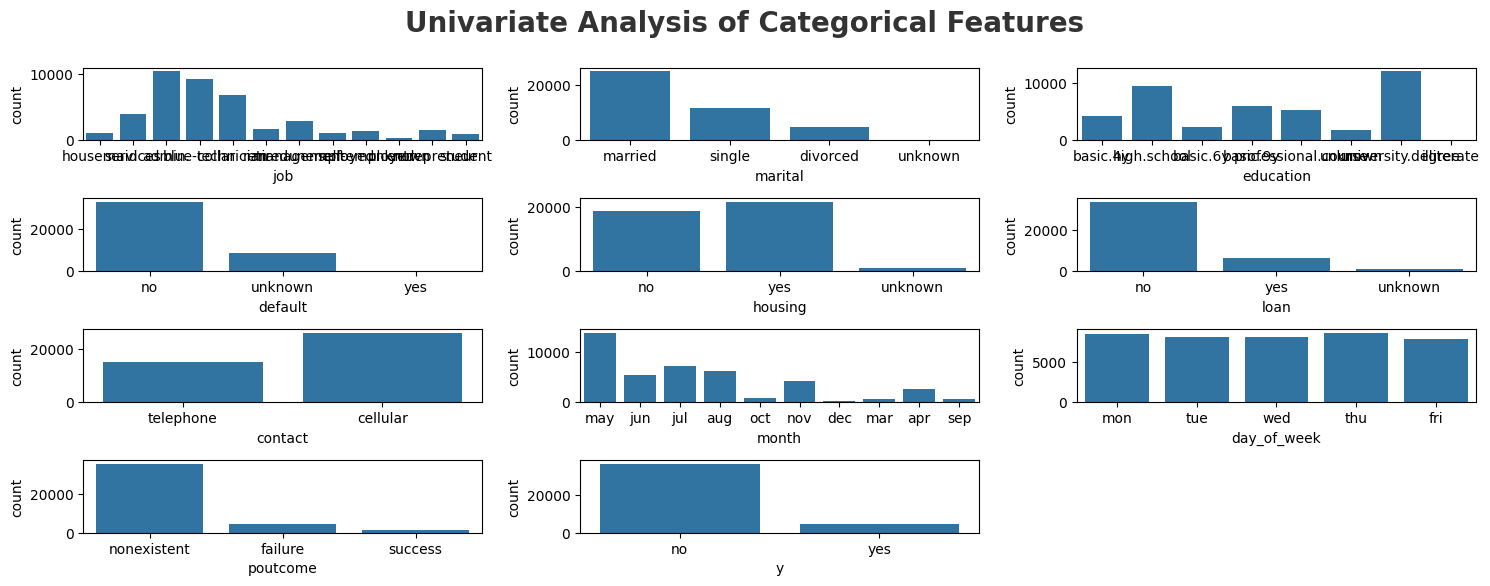

In [11]:
# categorical columns
plt.figure(figsize=(15, 8))
plt.suptitle('Univariate Analysis of Categorical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(categorical_features)):
    plt.subplot(6, 3, i+1)
    sns.countplot(x=df[categorical_features[i]])
    plt.xlabel(categorical_features[i])
    plt.tight_layout()
    
# save plot
# plt.savefig('./images/Univariate_Cat.png')

Single Dominant Categories:
Poutcome: Nonexistent (86.34%) is overwhelmingly dominant compared to failure (10.32%) and success (3.33%).
Response (y): No (88.73%) is dominant, indicating most customers did not subscribe.

Categories with Unknown or Null Values:
Default on Credit: 20.87% of values are unknown, which is significant and could indicate missing or incomplete data.
Housing Loan: 2.40% of values are unknown.
Personal Loan: 2.40% of values are unknown.
Marital Status: Unknown accounts for 0.19%.
Education: Unknown forms 4.20%.

Balanced Data:
Day of the Week: Fairly balanced across all days, with percentages ranging from 19.00% to 20.94%.
Contact Type: While cellular (63.47%) is more common, the distribution with telephone (36.53%) is somewhat balanced.







Multivariate Analysis
Multivariate analysis is the analysis of more than one variable.
Check Multicollinearity for Categorical features


A chi-square statistic is one way to show a relationship between two categorical variables.

Here we test correlation of Categorical columns with Target column i.e y

Null Hypothesis (
): The Feature is independent of target column (No-Correlation)

Alternative Hypothesis (
): The Feature and Target column are not independent (Correalted)

In [12]:
from scipy.stats import chi2_contingency
chi2_test = []
for feature in categorical_features:
    if chi2_contingency(pd.crosstab(df['y'], df[feature]))[1] < 0.05:
        chi2_test.append('Reject Null Hypothesis')
    else:
        chi2_test.append('Fail to Reject Null Hypothesis')
result = pd.DataFrame(data=[categorical_features, chi2_test]).T
result.columns = ['Column', 'Hypothesis Result']
result

,Column,Hypothesis Result
0,job,Reject Null Hypothesis
1,marital,Reject Null Hypothesis
2,education,Reject Null Hypothesis
3,default,Reject Null Hypothesis
4,housing,Fail to Reject Null Hypothesis
5,loan,Fail to Reject Null Hypothesis
6,contact,Reject Null Hypothesis
7,month,Reject Null Hypothesis
8,day_of_week,Reject Null Hypothesis
9,poutcome,Reject Null Hypothesis


Here housing and loan fails to Rejects Null Hypothesis which means it doesn't correlate with target column.

In [13]:
continues_features=[feature for feature in numeric_features if len(df[feature].unique())>=10]
print('Num of continues features :',continues_features)

Num of continues features : ['age', 'duration', 'campaign', 'pdays', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']


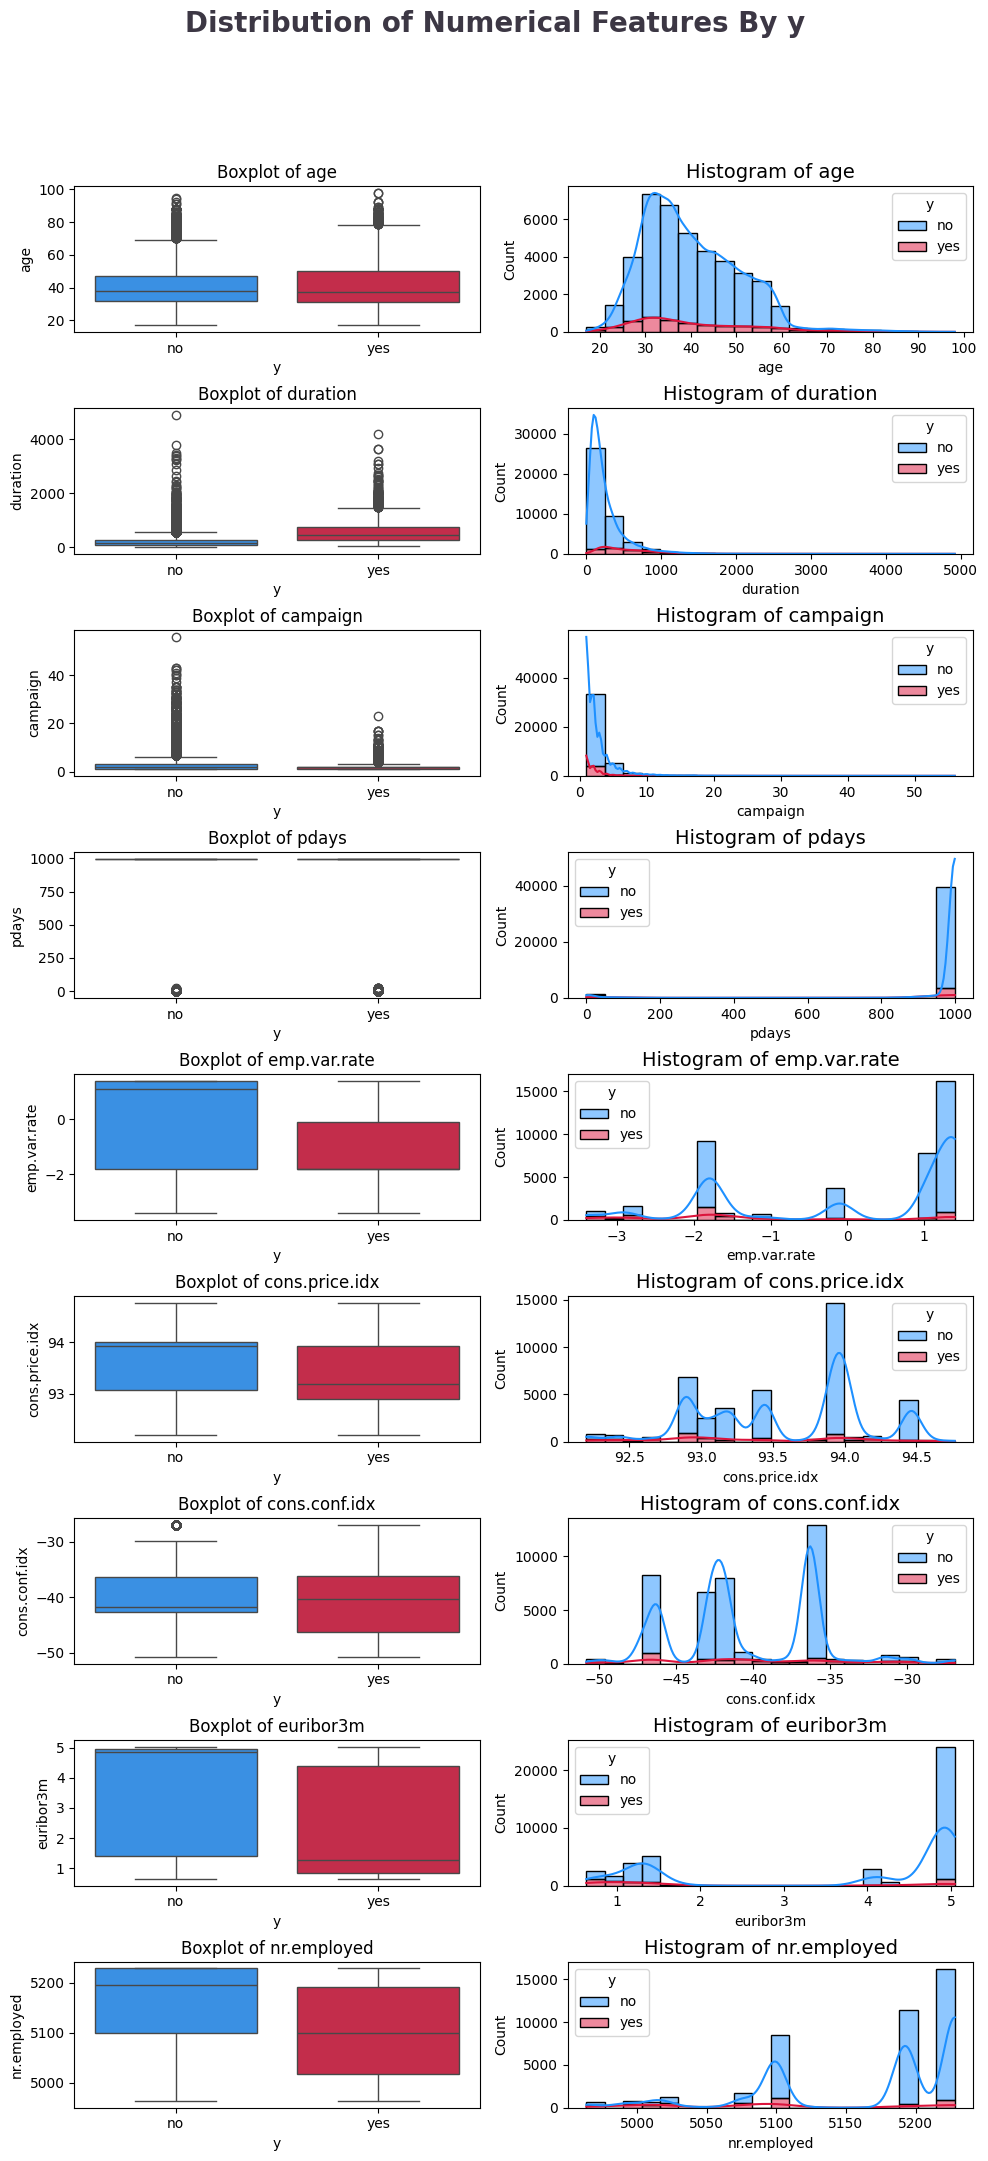

In [14]:
#Distribution of Numerical Features By y
clr1 = ['#1E90FF', '#DC143C']
fig, ax = plt.subplots(9, 2, figsize=(10,22))
fig.suptitle('Distribution of Numerical Features By y', color='#3C3744',
             fontsize=20, fontweight='bold', ha='center')
for i, col in enumerate(continues_features):   
    sns.boxplot(data=df, x='y', y=col,  palette=clr1, ax=ax[i,0])
    ax[i,0].set_title(f'Boxplot of {col}', fontsize=12)
    sns.histplot(data=df, x=col, hue='y', bins=20, kde=True, 
                 multiple='stack', palette=clr1, ax=ax[i,1])
    ax[i,1].set_title(f'Histogram of {col}', fontsize=14)
fig.tight_layout()
fig.subplots_adjust(top=0.90)
# plt.savefig('images/multivariate_num.png')

Initial Analysis Report
Duration campaign have many outliers which can be Handled in Feature Engineering and Duration campaign are Right Skewed.
pdays is left skewed and some outliers below the lower bound of Box plot.
age is left skewed with outliers above upper bound of box plot.
There are  missing values with unknown in the dataset.
The y column is the target to predict.
In the Categorical column, features can be made Binary numerical in feature Encoding

Visualization

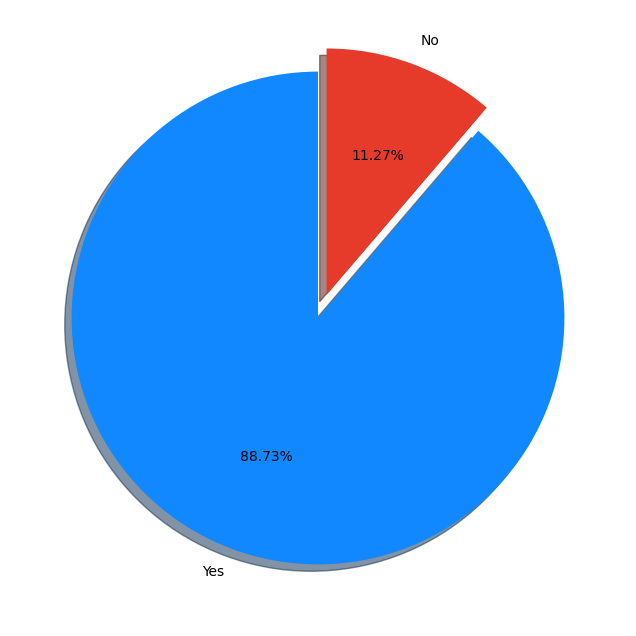

In [15]:
#Visualize the Target Feature
percentage = df.y.value_counts(normalize=True)*100
labels = ["Yes","No"]

# Plot PieChart with Ploty library
fig, ax = plt.subplots(figsize =(8, 8))
explode = (0, 0.1)
colors = ['#1188ff','#e63a2a']
ax.pie(percentage, labels = labels, startangle = 90,
       autopct='%1.2f%%',explode=explode, shadow=True, colors=colors)
plt.show()

From the chart it is seen that the Target Variable is Imbalanced What is imbalanced data?
Imbalanced data are types of data where the target class has an uneven distribution of observations, i.e Here Yes value has more count than the No value of the dataset.

In [17]:

    #group data by continent and their count of case_status
df.groupby('job')['y'].value_counts(normalize=True).to_frame()*100

proportion
job           y              
admin.        no    87.027442
              yes   12.972558
blue-collar   no    93.105684
              yes    6.894316
entrepreneur  no    91.483516
              yes    8.516484
housemaid     no    90.000000
              yes   10.000000
management    no    88.782490
              yes   11.217510
retired       no    74.767442
              yes   25.232558
self-employed no    89.514426
              yes   10.485574
services      no    91.861930
              yes    8.138070
student       no    68.571429
              yes   31.428571
technician    no    89.173958
              yes   10.826042
unemployed    no    85.798817
              yes   14.201183
unknown       no    88.787879
              yes   11.212121

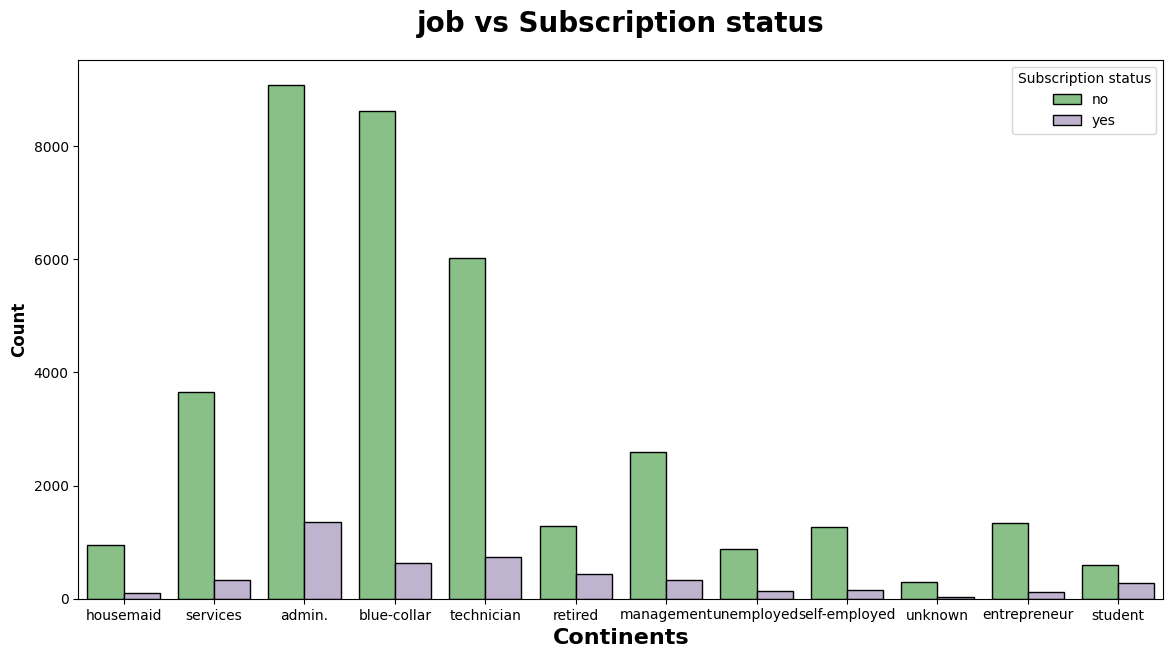

In [19]:
plt.subplots(figsize=(14,7))
sns.countplot(x="job",hue="y", data=df, ec = "black",palette="Accent")
plt.title("job vs Subscription status", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.xlabel("Continents", weight="bold", fontsize=16)
plt.legend(title="Subscription status", fancybox=True)
plt.show()

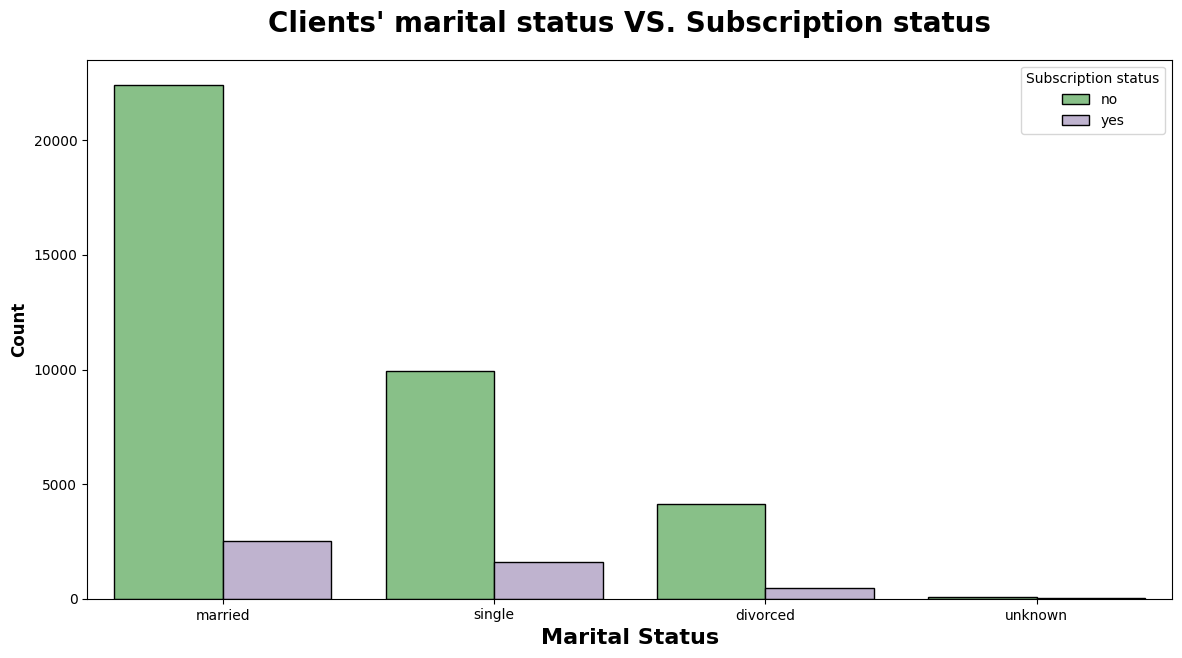

In [20]:
#Clients' marital status VS. Subscription status
plt.subplots(figsize=(14,7))
sns.countplot(x="marital",hue="y", data=df, ec = "black",palette="Accent")
plt.title("Clients' marital status VS. Subscription status", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.xlabel("Marital Status", weight="bold", fontsize=16)
plt.legend(title="Subscription status", fancybox=True)
plt.show()

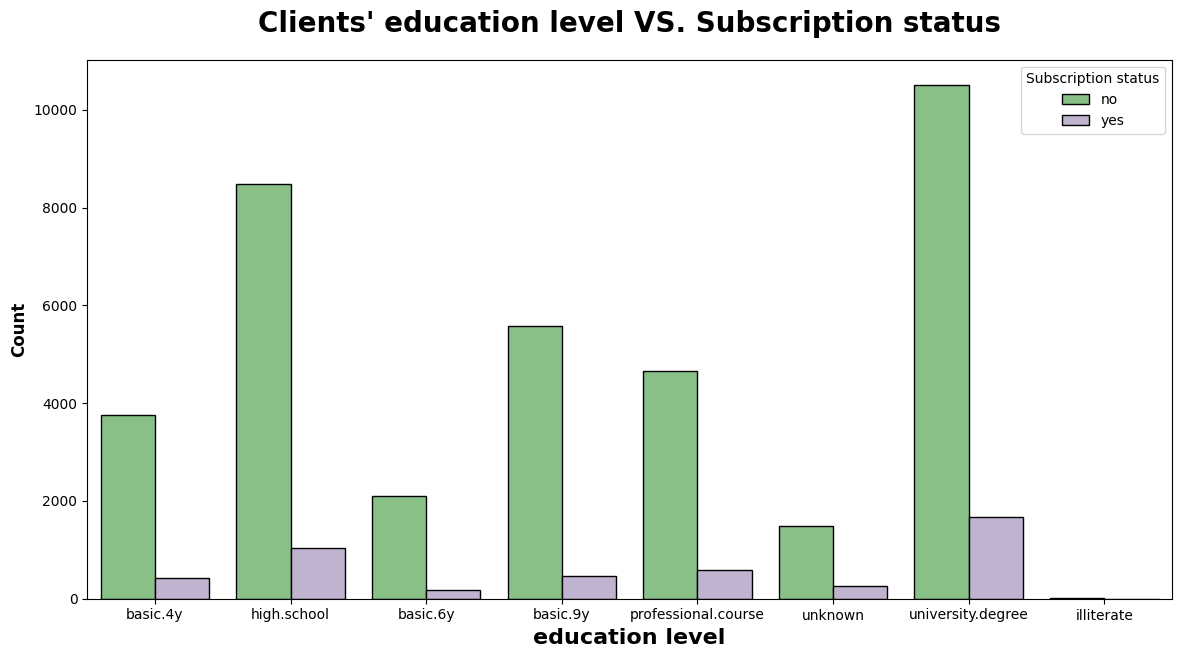

In [21]:
#Clients' education level VS. Subscription status
plt.subplots(figsize=(14,7))
sns.countplot(x="education",hue="y", data=df, ec = "black",palette="Accent")
plt.title("Clients' education level VS. Subscription status", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.xlabel("education level", weight="bold", fontsize=16)
plt.legend(title="Subscription status", fancybox=True)
plt.show()

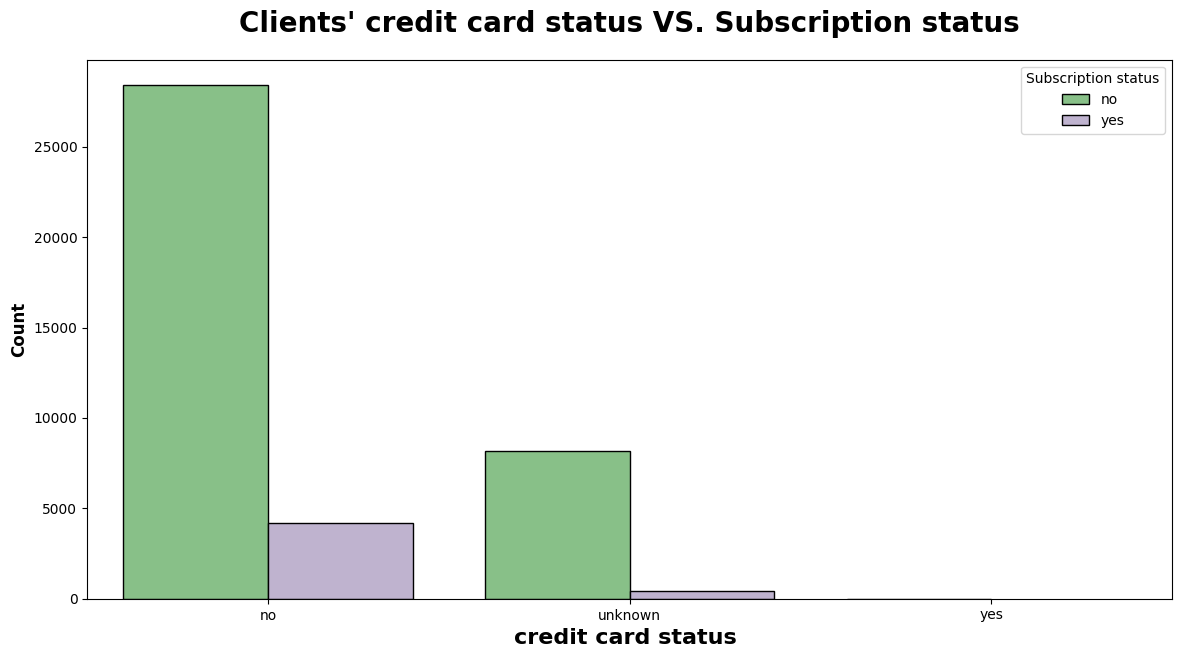

In [22]:
#Clients' credit card status VS. Subscription status
plt.subplots(figsize=(14,7))
sns.countplot(x="default",hue="y", data=df, ec = "black",palette="Accent")
plt.title("Clients' credit card status VS. Subscription status", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.xlabel("credit card status ", weight="bold", fontsize=16)
plt.legend(title="Subscription status", fancybox=True)
plt.show()

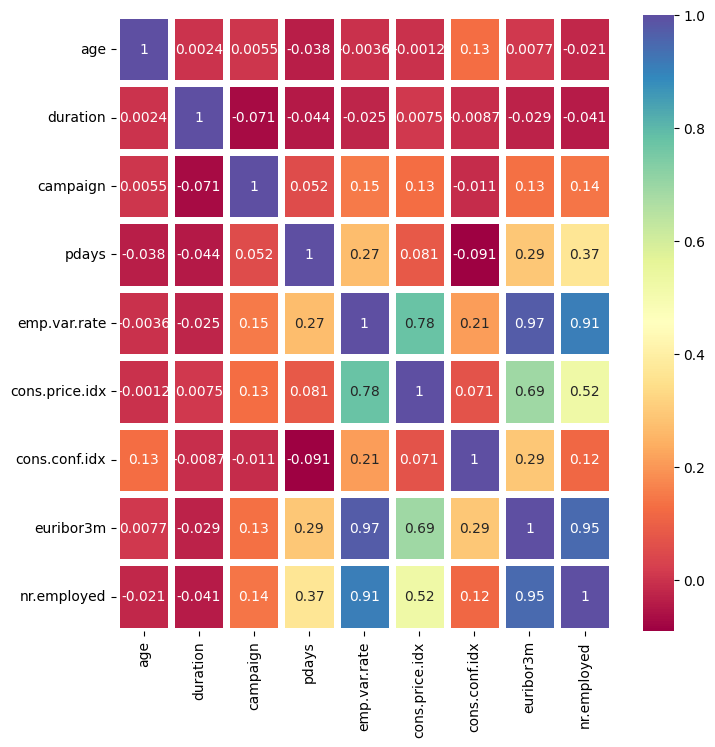

In [36]:
plt.figure(figsize = (8, 8))
sns.heatmap(df[continues_features].corr(), 
            cmap='Spectral', linewidths= 5, annot = True)
plt.show()

the number of unknown values in default = 7757
the percentage of unknown values in default = 20.282
--------------------------------------------------


job
admin.           9937
blue-collar      8560
technician       6380
services         3716
management       2728
retired          1577
entrepreneur     1360
self-employed    1349
housemaid         987
unemployed        963
student           688
Name: count, dtype: int64

marital
married     23183
single      10760
divorced     4302
Name: count, dtype: int64

education
university.degree      11821
high.school             9244
basic.9y                5856
professional.course     5100
basic.4y                4002
basic.6y                2204
illiterate                18
Name: count, dtype: int64

housing
yes    20578
no     17667
Name: count, dtype: int64

loan
no     32286
yes     5959
Name: count, dtype: int64

In [44]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')